# TCDF: Temporal Causal Discovery Framework

This notebook shows the functionality of TCDF. 

See the corresponding paper for more detail: __["Causal Discovery with Attention-Based Convolutional Neural Networks"](https://www.mdpi.com/2504-4990/1/1/19)__.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pickle, torch, json
import numpy as np
import pandas as pd

In [3]:
from runTCDF import runTCDF

In [4]:
gem = pd.read_csv('./data/Pancreas_Ms.csv', index_col = 0)

In [5]:
#import TF-target pairs
with open('../celloracle/TF_targets_pancreas.json', 'r') as fp:
    TF_info = json.load(fp)

In [6]:
links = runTCDF(gem, tf_target_pairs=TF_info, cuda=True, significance=1)

Number of genes:  0 [0%]
Number of genes: 100 [5%]
Number of genes: 200 [11%]
Number of genes: 300 [16%]
Number of genes: 400 [22%]
Number of genes: 500 [27%]
Number of genes: 600 [32%]
Number of genes: 700 [38%]
Number of genes: 800 [43%]
Number of genes: 900 [48%]
Number of genes: 1000 [54%]
Number of genes: 1100 [59%]
Number of genes: 1200 [65%]
Number of genes: 1300 [70%]
Number of genes: 1400 [75%]
Number of genes: 1500 [81%]
Number of genes: 1600 [86%]
Number of genes: 1700 [92%]
Number of genes: 1800 [97%]


In [8]:
links.head()

,TF,importance,target
0,E2f1,3.496073,Dnajc9
1,Nr2f6,2.805882,Dnajc9
2,Atf3,2.740142,Dnajc9
3,Npdc1,2.353651,Dnajc9
4,Pax4,2.045232,Dnajc9


In [36]:
pickle.dump(links, open( "links.p", "wb" ) )

In [29]:
links[links.importance >0].head(10)

,TF,importance,target
0,E2f1,3.496073,Dnajc9
1,Nr2f6,2.805882,Dnajc9
2,Atf3,2.740142,Dnajc9
3,Npdc1,2.353651,Dnajc9
4,Pax4,2.045232,Dnajc9
5,Fos,0.948898,Dnajc9
6,Pax6,0.889308,Dnajc9
7,Fosb,0.426776,Dnajc9
8,Fev,0.258400,Dnajc9
0,Vdr,3.064059,Usp9x


In [12]:
import seaborn as sns

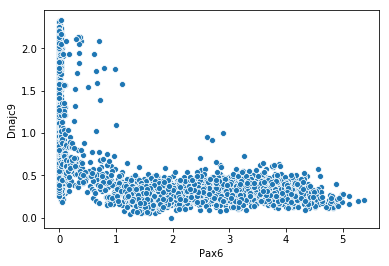

In [34]:
sns.scatterplot(data=gem, x="Pax6", y="Dnajc9")

In [35]:
np.corrcoef(gem["Pax6"], gem["Dnajc9"])

array([[ 1.        , -0.52645275],
       [-0.52645275,  1.        ]])

In [ ]:
#DONE: validate all coefficients, do not filter >1
#DONE: change the output to dataframe

#TODO: add to git
#TODO: copy link class from CellOracle to do the analysis
#TODO: check if positives and negatives make sense (correlation)
#TODO: see a way of incorporating correlation

#TODO: Batch normalization
#TODO: training and validation sets, k-fold cross-validation
#TODO: sampling Markov Chains
#TODO: early stopping
#TODO: combined loss function
#TODO: add tqdm bar
#TODO: add self loops for transcription factors by adding a delay on it and incorporate it to the 
#      feature matrix

#check gastrulation data not with velocity*

#libraries I had to install: tqdm, ipywidgets, seaborn

In [28]:
pickle.dump(links, open( "links.p", "wb" ) )

In [30]:
links.head()

,TF,importance,target
0,Npdc1,2.968795,Acot7
1,Nr4a1,2.862359,Acot7
2,Tead2,2.722077,Acot7
3,Nkx6-1,2.662524,Acot7
4,Foxp1,2.540190,Acot7


In [13]:
allcauses = pickle.load( open( "allcauses.p", "rb" ) ) #validated causes
alldelays = pickle.load( open( "alldelays.p", "rb" ) ) #delays of validated causes
allrealosses = pickle.load( open( "allrealosses.p", "rb" ) ) #loss function of each target gene
allscores = pickle.load( open( "allscores.p", "rb" ) ) #attention scores of each TFs for each target gene
columns = pickle.load( open( "columns.p", "rb" ) ) #name of genes

In [30]:
len(columns)

179

In [37]:
df = pd.DataFrame()

for i in np.arange(len(columns)-1):
    temp_df = pd.DataFrame({'TF':columns, 'score':allscores[1]})
    temp_df['target'] = columns[i+1]
    temp_df['importance'] = abs(temp_df['score'])
    temp_df = temp_df.iloc[1:]
    temp_df = temp_df.drop('score',axis=1)
    temp_df.sort_values(by='importance', ascending=False)
    df = pd.concat([df, temp_df])

In [39]:
df.to_csv('./adjacencies_tcdf.csv')

In [7]:
"""Run TCDF and evaluate by comparing the results to the ground truth"""
#%matplotlib inline
#%run -i "runTCDF.py" --ground_truth data/demo_dataset.csv=data/demo_groundtruth.csv  --epochs 500 --log_interval 250 --plot

'Run TCDF and evaluate by comparing the results to the ground truth'

Arguments: Namespace(cuda=False, data=['data/demo_dataset.csv'], dilation_coefficient=4, epochs=1000, hidden_layers=0, kernel_size=4, learning_rate=0.01, log_interval=500, optimizer='Adam', plot=True, seed=1111, train_test_split=0.8)

 Analysis started for target:  Timeser0
Epoch:  1 [0%] 	Loss: 2.302341
Epoch: 500 [50%] 	Loss: 1.684885
Epoch: 1000 [100%] 	Loss: 1.684628

 Analysis started for target:  Timeser1
Epoch:  1 [0%] 	Loss: 4.267725
Epoch: 500 [50%] 	Loss: 0.002414
Epoch: 1000 [100%] 	Loss: 0.002391

 Analysis started for target:  Timeser2
Epoch:  1 [0%] 	Loss: 1.714815
Epoch: 500 [50%] 	Loss: 0.357675
Epoch: 1000 [100%] 	Loss: 0.357274

 Analysis started for target:  Timeser3 
Epoch:  1 [0%] 	Loss: 2.279164
Epoch: 500 [50%] 	Loss: 1.672744
Epoch: 1000 [100%] 	Loss: 1.671476

Mean Absolute Scaled Error (MASE) averaged over all time series in data/demo_dataset.csv : 0.46831273714337796 with standard deviation 0.3081046067842619


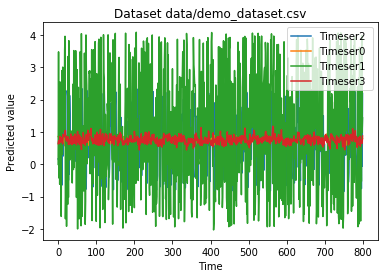

In [8]:
"""Evaluates the prediction accuracy of TCDF."""
"""For more information about MASE (Mean Absolute Scaled Error), see https://otexts.org/fpp2/accuracy.html"""

%matplotlib inline
%run -i "evaluate_predictions_TCDF.py" --data data/demo_dataset.csv --plot